>## **Practice Project : 4. Abalone Case Study**
**By: Ms. Yashshree bawiskar**

**Batch: 1838**

### **Problem Statement:**

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

#### **Attribute Information**

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

**Name / Data Type / Measurement Unit / Description**

- Sex / nominal / -- / M, F, and I (infant)

- Length / continuous / mm / Longest shell measurement

- Diameter / continuous / mm / perpendicular to length

- Height / continuous / mm / with meat in shell

- Whole weight / continuous / grams / whole abalone

- Shucked weight / continuous / grams / weight of meat

- Viscera weight / continuous / grams / gut weight (after bleeding)

- Shell weight / continuous / grams / after being dried

- Rings / integer / -- / +1.5 gives the age in years. 

**You have to predict the rings of each abalone which will lead us to the age of that abalone.**

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset CSV file using pandas
abalone=pd.read_csv('abalone.csv')

In [4]:
print('No. of Rows :',abalone.shape[0])
print('No. of Columns :',abalone.shape[1])
abalone.head()  # Showing Top 5 Rows

No. of Rows : 4177
No. of Columns : 9


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Lets sort Columns by their datatype
abalone.columns.to_series().groupby(abalone.dtypes).groups

{int64: ['Rings'], float64: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], object: ['Sex']}

#### Observation:
- **This dataset contain 4177 rows and 9 columns.**
- **We have feature 'sex' with object datatype which is categorical feature in nature.**
- **Rest of feature comes with numerical datatypes like int64 & Float64.**

***Our Target feature in this dataset is 'Rings' which need to predict using Regression based Machine learning model.*** 

In [6]:
# Spliting data into Numerical & Categorical Features
Numerical = ['Rings','Length', 'Diameter', 'Height', 'Whole weight', 
             'Shucked weight', 'Viscera weight', 'Shell weight']
Categorical = ['Sex']

#### Missing Value check 

In [7]:
abalone.isnull().sum().any()

False

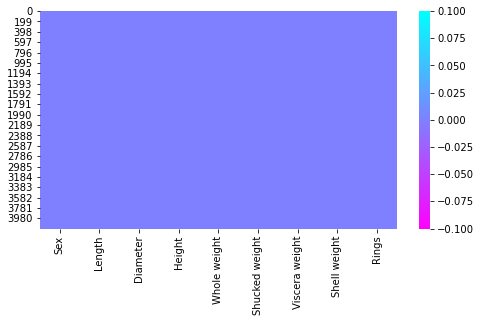

In [8]:
# Heatmap of Missing value 
plt.figure(figsize = (8,4))
sns.heatmap(abalone.isnull(), cmap='cool_r')
plt.show()

**we can see that no attribute contain NaN values.** 

In [9]:
display('Table 1: Summary of Continous features')
display(abalone.describe(include=['int64','float64']).T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu'))

'Table 1: Summary of Continous features'

,count,mean,std,min,25%,50%,75%,max
Length,4177.000000,0.523992,0.120093,0.075000,0.450000,0.545000,0.615000,0.815000
Diameter,4177.000000,0.407881,0.099240,0.055000,0.350000,0.425000,0.480000,0.650000
Height,4177.000000,0.139516,0.041827,0.000000,0.115000,0.140000,0.165000,1.130000
Whole weight,4177.000000,0.828742,0.490389,0.002000,0.441500,0.799500,1.153000,2.825500
Shucked weight,4177.000000,0.359367,0.221963,0.001000,0.186000,0.336000,0.502000,1.488000
Viscera weight,4177.000000,0.180594,0.109614,0.000500,0.093500,0.171000,0.253000,0.760000
Shell weight,4177.000000,0.238831,0.139203,0.001500,0.130000,0.234000,0.329000,1.005000
Rings,4177.000000,9.933684,3.224169,1.000000,8.000000,9.000000,11.000000,29.000000


In [10]:
abalone.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

#### Observation on Statstical Matrix :

1. Minimum of ring is 1 and maximum number of rings is 29.

2. There is lot of difference between 3rd quartile and maximum value in height, whole weight and shucked weight.**So there is possibilty of outliers in these columns.**

3. By taking consideration of mean and std deviation columns in staticscal summary we can see that **spread of distribution is large in case of whole weight and Rings columns.**

4. **Average number of rings in abalone is 9.** So in further investiagtion we need to range of number in case of adult abalone and infant abalone.

5. From Max row we can say that there is possibilty that abalone having higher height, whole weight, shucked weight and higher number of rings. So inturn need to investigate relation between age and aspects like weight, height.

## **Exploratory Data Analysis**

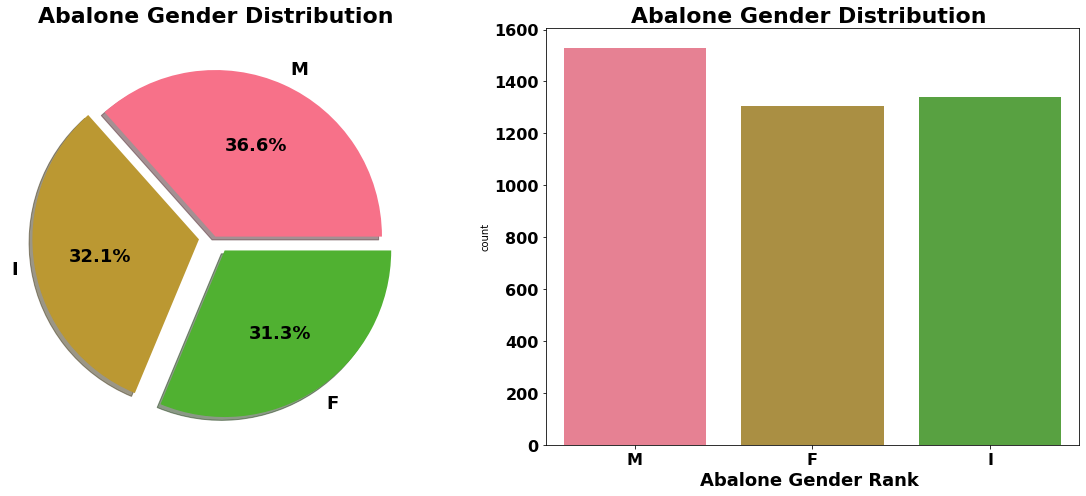

Value Count of Abalone Gender-wise


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [11]:
# Exploration of Feature rank
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
abalone['Sex'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Abalone Gender Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Sex', data=abalone,ax=ax[1])
ax[1].set_title('Abalone Gender Distribution ',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Abalone Gender Rank ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()
print('='*100)
print('Value Count of Abalone Gender-wise')
abalone['Sex'].value_counts()

#### Observation:

- Sex has **three unique categories Male, Female and infant.**
- Around 36.6% of abalone are Male followed by 32.1% Infant & 31.3% female abalone.
- Sex is categorical data having object datatypes need to convert into numerical datatypes using encoding techniques for model building purpose.

**Let check average values of different physical feature of abalone for each sex.**

In [12]:
means = pd.pivot_table(data=abalone, index='Sex',aggfunc={'Length':np.mean, 'Diameter':np.mean, 'Height':np.mean, 
                                                     'Whole weight':np.mean,'Shucked weight':np.mean,
                                                     'Viscera weight':np.mean,'Shell weight':np.mean,'Rings':np.mean})
means

,Diameter,Height,Length,Rings,Shell weight,Shucked weight,Viscera weight,Whole weight
Sex,,,,,,,,
F,0.454732,0.158011,0.579093,11.129304,0.302010,0.446188,0.230689,1.046532
I,0.326494,0.107996,0.427746,7.890462,0.128182,0.191035,0.092010,0.431363
M,0.439287,0.151381,0.561391,10.705497,0.281969,0.432946,0.215545,0.991459


#### Observation :
- **We get interesting obervation here, `For all features the average size of Female Abalone is greater than Male Abalone.`**
- **On Average infant abalone has whole weight 60% less than adult abalone.**

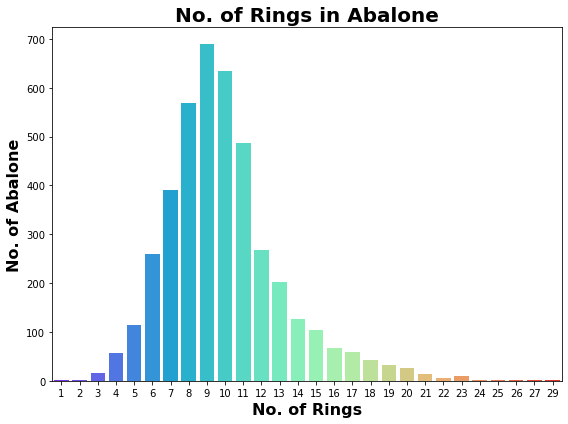

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(abalone['Rings'], palette='rainbow')
plt.title('No. of Rings in Abalone', fontweight='bold', fontsize=20)
plt.xlabel('No. of Rings', fontweight='bold', fontsize=16)
plt.ylabel('No. of Abalone', fontweight='bold', fontsize=16)
plt.show()

***Comment -
Maximum number of rings observe in abalone 9,10, 8 rings in decremental order.
No abalone has 28 rings.
The number of rings measured in the data ranges from 1 to 29 and most of the abalone have between 5 and 15 rings.***

In [14]:
means = pd.pivot_table(data=abalone, index='Rings' ,aggfunc={'Length':np.mean, 'Diameter':np.mean, 'Height':np.mean, 
                                                     'Whole weight':np.mean,'Shucked weight':np.mean,
                                                     'Viscera weight':np.mean,'Shell weight':np.mean,})
means

,Diameter,Height,Length,Shell weight,Shucked weight,Viscera weight,Whole weight
Rings,,,,,,,
1,0.055000,0.010000,0.075000,0.001500,0.001000,0.000500,0.002000
2,0.100000,0.025000,0.150000,0.005000,0.004500,0.004000,0.015000
3,0.128667,0.041667,0.176000,0.008933,0.011767,0.006267,0.028400
4,0.161579,0.053947,0.221491,0.018000,0.024719,0.012956,0.059605
5,0.210696,0.069913,0.285739,0.036770,0.061696,0.027330,0.125500
6,0.278861,0.091776,0.369363,0.078388,0.123158,0.058371,0.273174
7,0.321535,0.105921,0.422033,0.111648,0.182657,0.085899,0.397386
8,0.384798,0.128556,0.498776,0.178609,0.293773,0.138502,0.640753
9,0.425218,0.142721,0.546865,0.236509,0.387938,0.187803,0.852013


**Based on tables above, we have a clear view of the whole data**
- **As number of rings increases the whole weight & Length of abalone increases.**
- **Upto *21 Rings as Diameter & Shucked weight increase with increase in number of rings* while after `21 rings when number of rings increases the diameter & Shucked weight of abalone decreases`.**

### Exporation of Weight related features

#### Note on Whole Weight:
- **Feature Whole_weight is linear function of features Shucked_weight, Viscersa_weight and Shell_weight**
- **From domain knowledge we know that,  
`Whole_weight = Shucked_weight + Viscera_weight+ Shell_weight + unknown mass of water/blood lost from shucking process`.** 

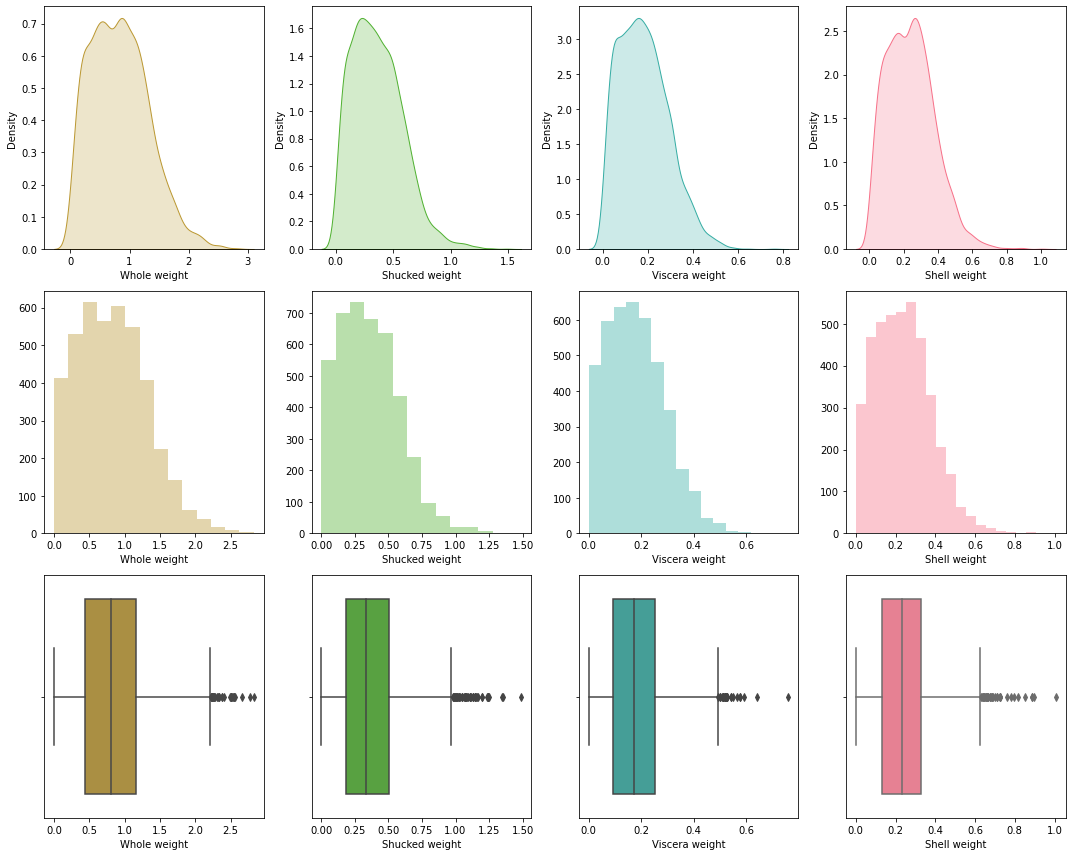

In [15]:
plt.figure(figsize=(15,12))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
Z = sns.kdeplot(abalone['Whole weight'], fill =True,color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
Z = sns.kdeplot(abalone['Shucked weight'],fill =True, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.kdeplot(abalone['Viscera weight'],fill =True, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.kdeplot(abalone['Shell weight'],fill =True, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.distplot(abalone['Whole weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
Z = sns.distplot(abalone['Shucked weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.distplot(abalone['Viscera weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.distplot(abalone['Shell weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.boxplot(abalone['Whole weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.boxplot(abalone['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
Z = sns.boxplot(abalone['Viscera weight'], color=colors[i % cols])


i += 1
plt.subplot(rows, cols, i)
Z = sns.boxplot(abalone['Shell weight'], color=colors[i % cols])
plt.tight_layout()
plt.show()

#### Observation:
- **Skew distribution of features indicates log distribition of feature, which can `transform into gaussian distribution using log tranformation of skewness.`**
- **We can outliers exist in weight related feature, but they are realistic considering skewed elongated nature of features.**

### Interpreting Relationship between Dependent Variable and Independent Variables

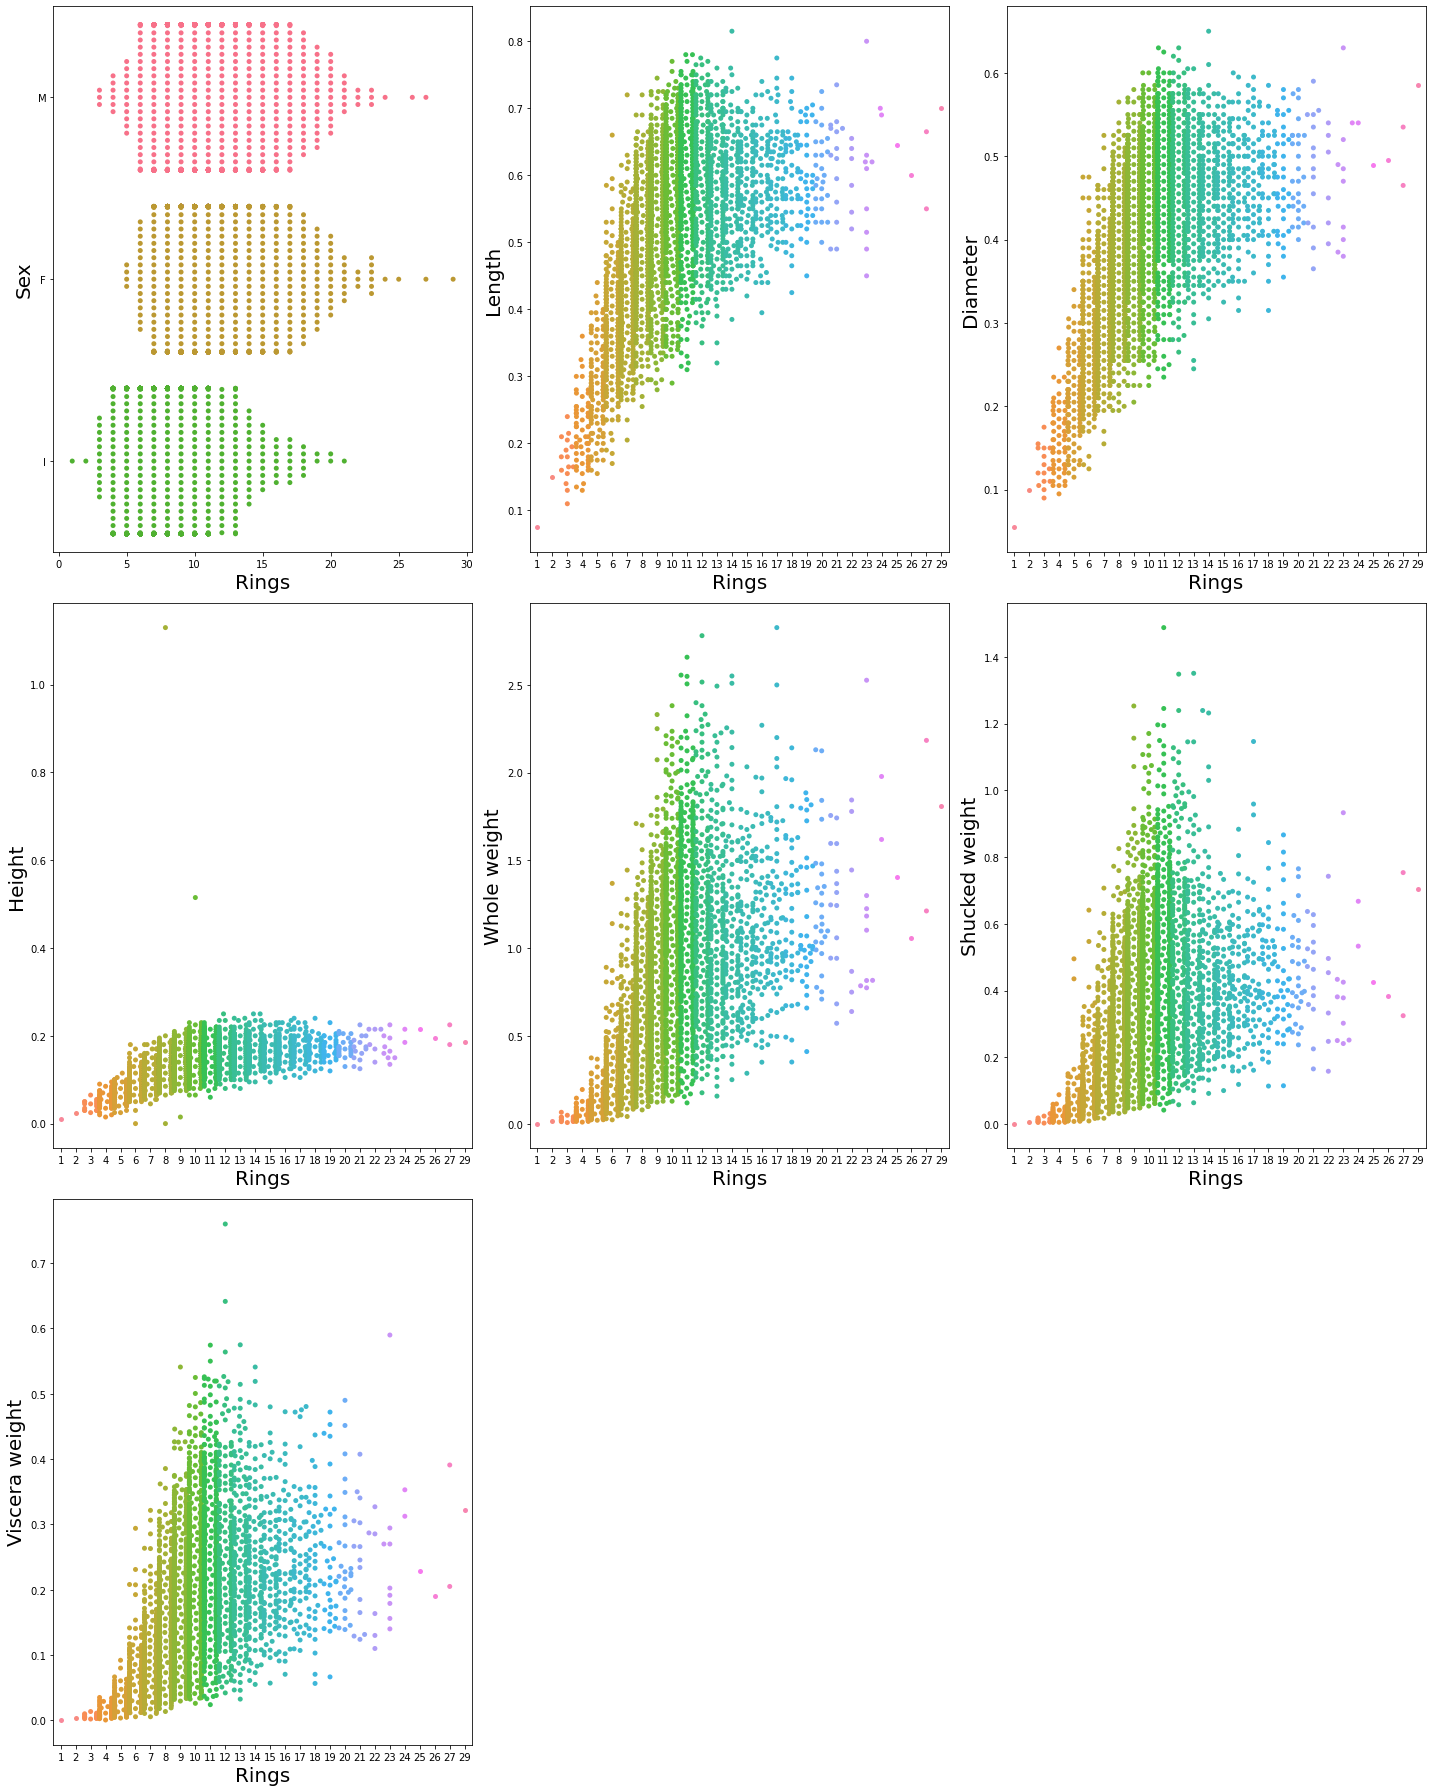

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
x = abalone['Rings']
for col in abalone:
    if plotnum<=7:
        plt.subplot(3,3,plotnum)
        sns.swarmplot(x,abalone[col])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

***From the above graphs it is observed that infants have rings ranging from 0 to 21 while Male and female have rings ranging from 5 t0 29. This may imply a negative correlation between infants and number of rings. Length, Diameter and the different weight attributes show an almost linear relationship with the number of rings. The presence of outliers can also be seen in all the features.***

<Figure size 1440x360 with 0 Axes>

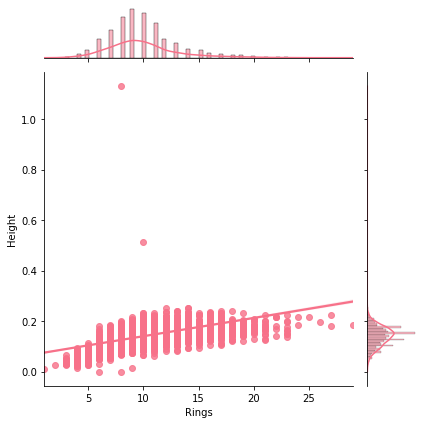

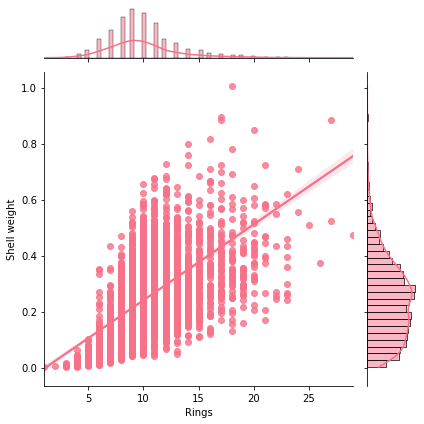

In [17]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg')

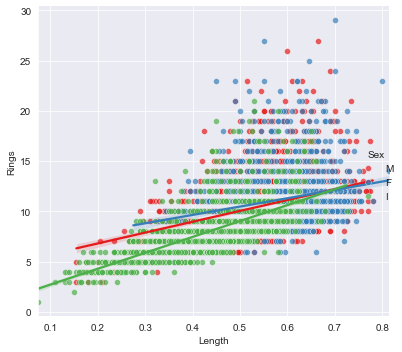

In [19]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Length', y = 'Rings', data = abalone, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

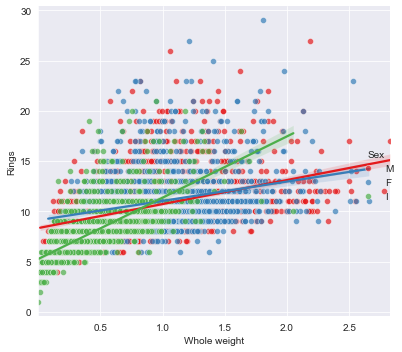

In [22]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Whole weight', y = 'Rings', data = abalone, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

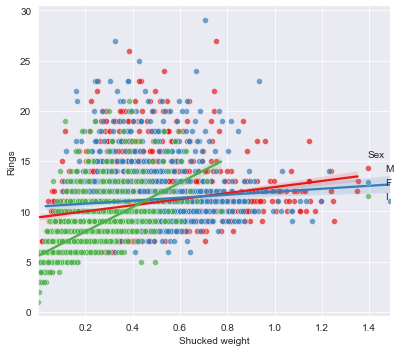

In [23]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Shucked weight', y = 'Rings', data = abalone, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

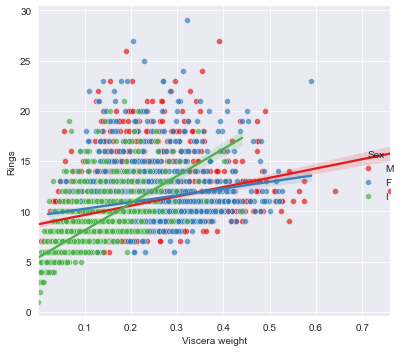

In [24]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Viscera weight', y = 'Rings', data = abalone, hue = 'Sex', palette = 'Set1', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

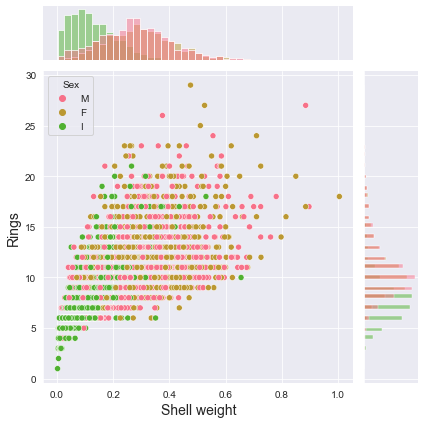

In [26]:
J = sns.JointGrid(data=abalone, x='Shell weight', y='Rings', hue='Sex')
J.plot(sns.scatterplot, sns.histplot)
J.set_axis_labels(xlabel='Shell weight', ylabel='Rings', fontsize=14)

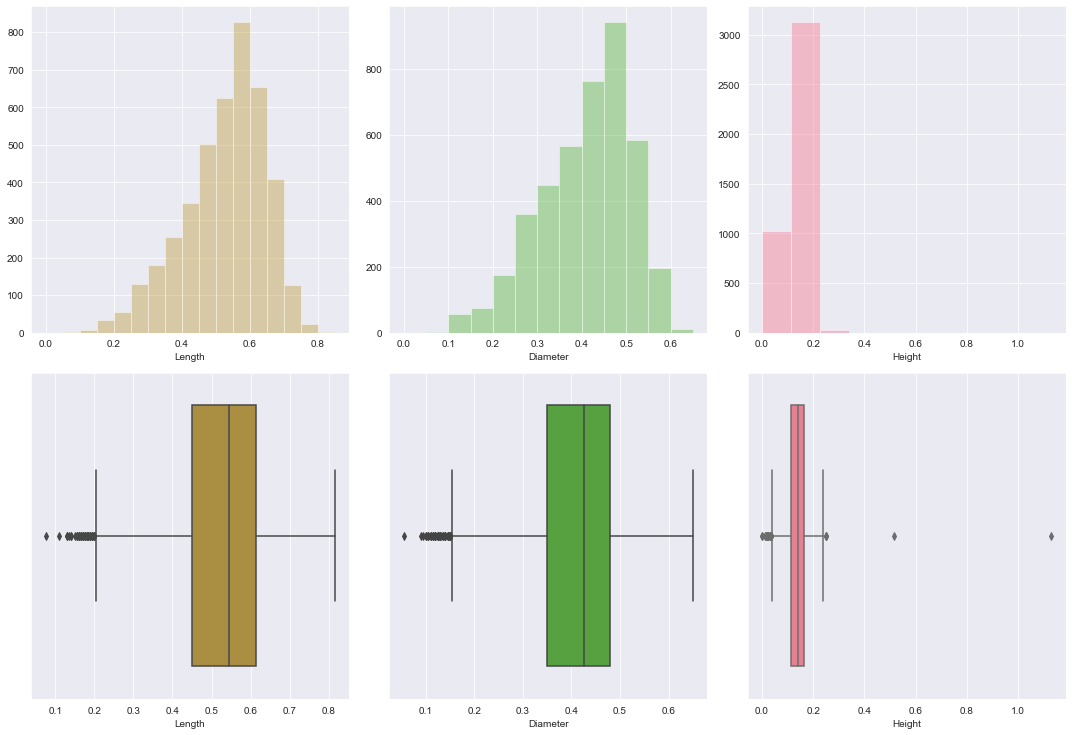

In [27]:
plt.figure(figsize=(15, 15))
colors = sns.color_palette()
lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Height'], color=colors[i % 3])


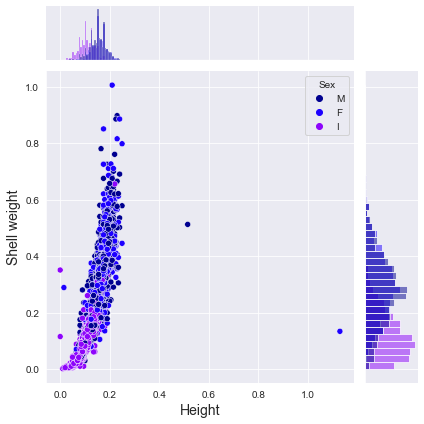

In [28]:
sns.set_palette('gnuplot2')
J = sns.JointGrid(data=abalone, x='Height', y='Shell weight', hue='Sex')
J.plot(sns.scatterplot, sns.histplot)
J.set_axis_labels(xlabel='Height', ylabel='Shell weight', fontsize=14)
plt.show()

- **We can see cubical trend relation with each other.**

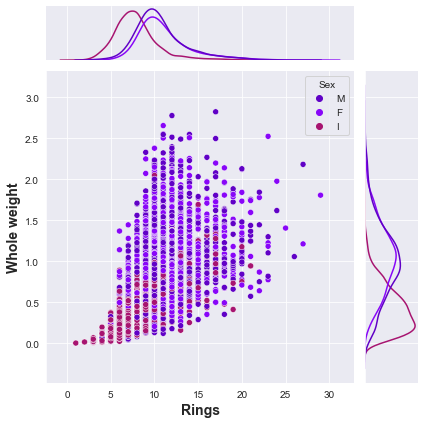

In [29]:
sns.set_palette('gnuplot')
J= sns.JointGrid(data=abalone, x='Rings', y='Whole weight', hue='Sex')
J.plot(sns.scatterplot, sns.kdeplot)
J.set_axis_labels(xlabel='Rings', ylabel='Whole weight', fontsize=14,fontweight ='bold')
plt.show()

#### Observation:
- **Irrespective of gender we can see that for number of rings between 10 to 15 whole weight is more compare to rest.**
- **For same number of rings male abalone has higher weight compare female abalone.**

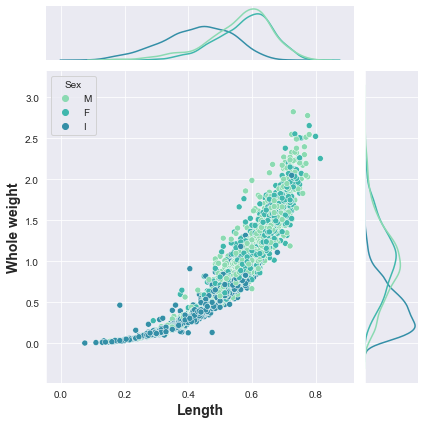

In [30]:
sns.set_palette('mako_r')
g = sns.JointGrid(data=abalone, x='Length', y='Whole weight', hue='Sex')
g.plot(sns.scatterplot, sns.kdeplot)
g.set_axis_labels(xlabel='Length', ylabel='Whole weight', fontsize=14,fontweight ='bold')
plt.show()

- **For same whole weight female abalone has more length than male abalone.**

<Figure size 864x720 with 0 Axes>

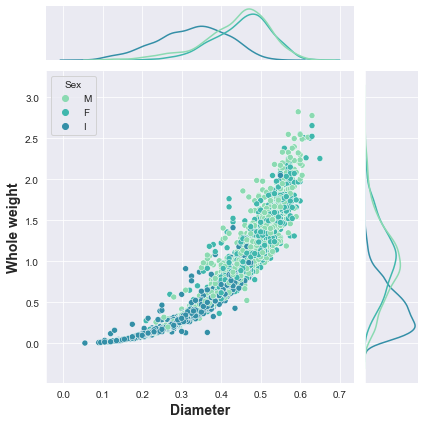

In [31]:
plt.figure(figsize= (12,10))
J= sns.JointGrid(data=abalone, x='Diameter', y='Whole weight', hue='Sex')
J.plot(sns.scatterplot, sns.kdeplot)
J.set_axis_labels(xlabel='Diameter', ylabel='Whole weight', fontsize=14,fontweight ='bold')
plt.show()

### Observation:
- **Female & Male abalone has almost same whole weight & Diameter distribution.**
- **we can see that these two feature related (in trend) with each other through mode of cubical fuction.**
- **As number of ring increases means as diameter increases taking this fact in consideration from above plot we can say that for old abalone diameter of female abalone is higher than male abalone.**
- **Upto certain range diameter whole weight of Male abalone is higher than female abalone of same age.**

### Pairplot of features

<Figure size 1440x1440 with 0 Axes>

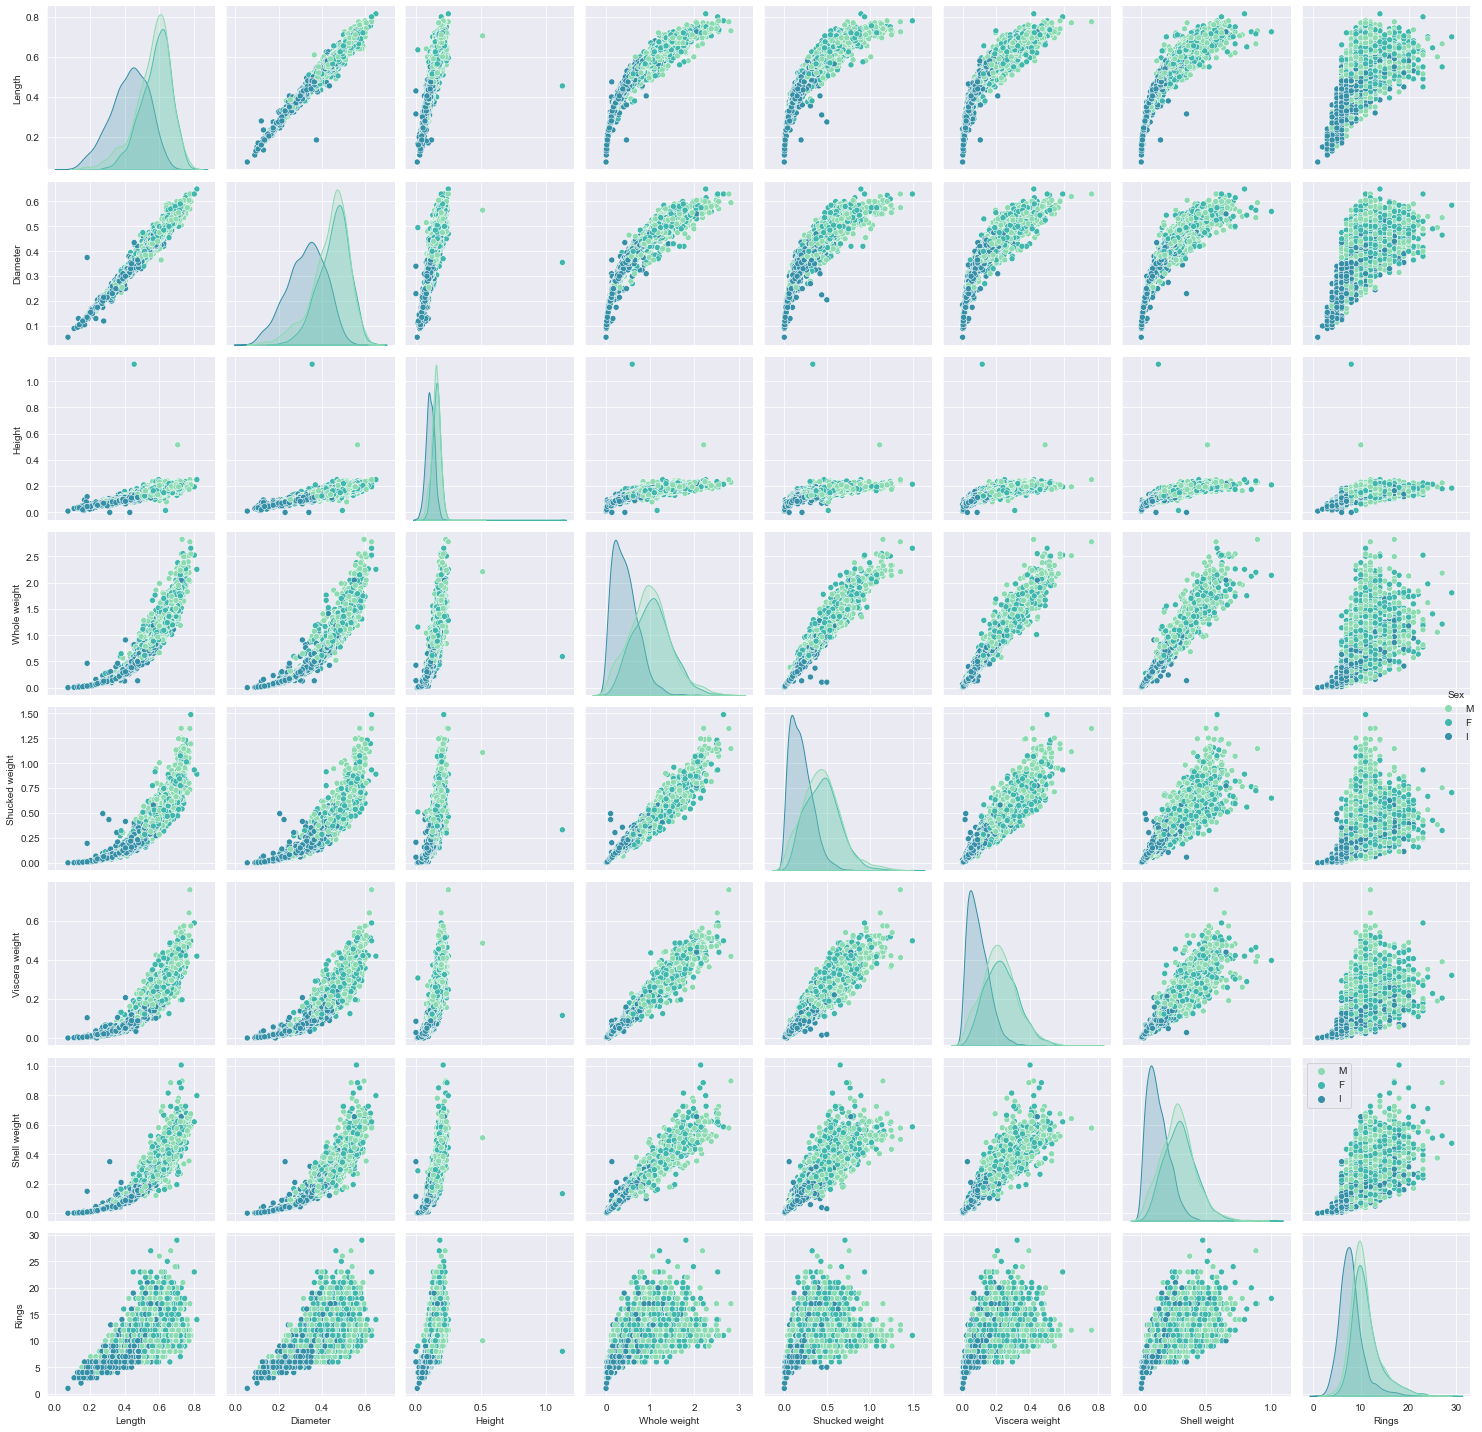

In [32]:
plt.figure(figsize= (20,20))
sns.pairplot(data=abalone, hue='Sex')
plt.legend()
plt.tight_layout()
plt.show()

#### Comment -
1. Many features are highly correlated
    - length and diameter show linear correlation
    - the length and weight features are quadratic correlated
    - whole weight is linearly correlated with other weight features
2. Number of Rings is positively corelated with almost all quadratic features
3. Possible outliers in Height features

Scatter plot analysis also shows that data mostly cover the values for Rings from 3 to little over 20, selecting only this data in the model may be taken under consideration to increase the accuracy.

### Correlation Heatmap

In [33]:
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


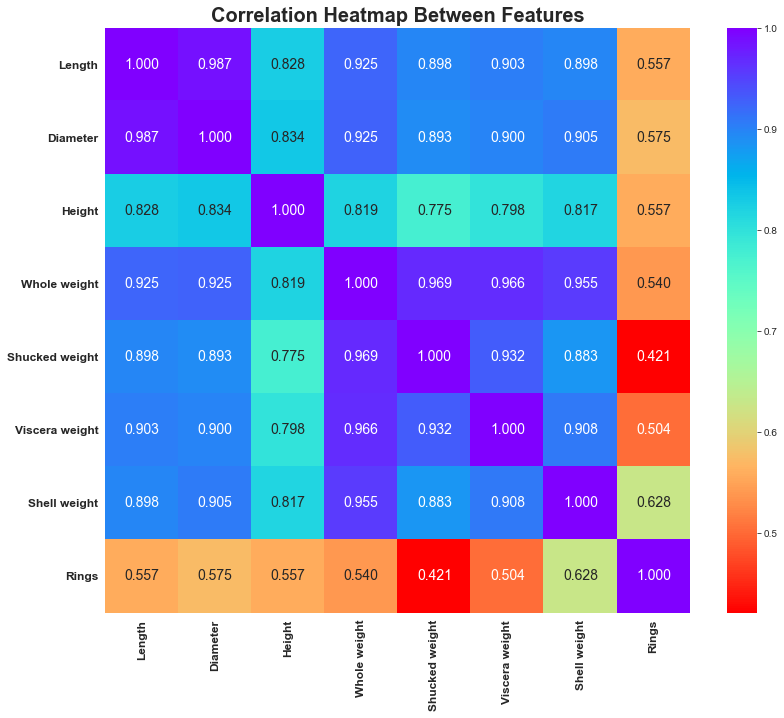

In [34]:
# cmap =PiYG cmap='Spectral'
plt.figure(figsize= (12,10))
sns.heatmap(abalone.corr(), annot= True,fmt='0.3f',square= True, annot_kws={'size':14}, cmap= 'rainbow_r')
plt.title('Correlation Heatmap Between Features',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold', rotation=90)
plt.yticks(fontsize=12,fontweight ='bold', rotation=0)
plt.tight_layout()
plt.show()

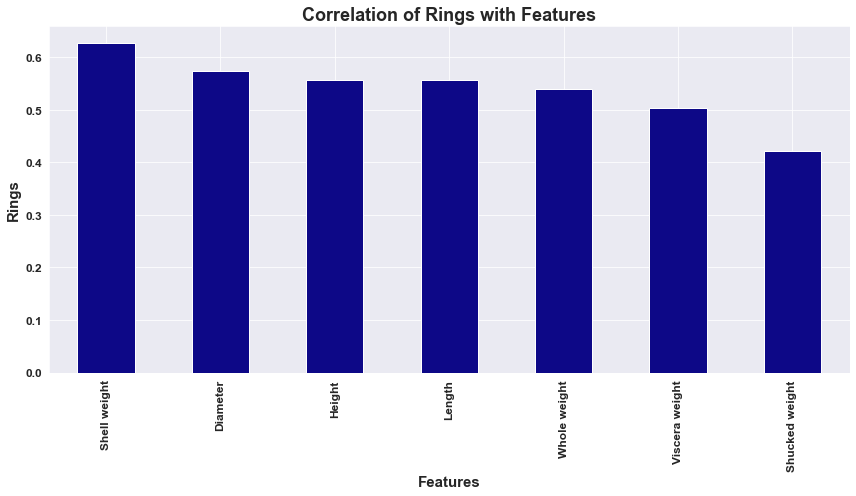

In [35]:
plt.figure(figsize = (12,7))
abalone.corr()['Rings'].drop(['Rings']).sort_values(ascending= False).plot(kind='bar',cmap ='plasma')
plt.xlabel('Features',fontsize=15,fontweight ='bold')
plt.ylabel('Rings',fontsize=15,fontweight ='bold')
plt.title('Correlation of Rings with Features',fontsize = 18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

- We can see that length & diameter are highly correlated with each other.**This indicate presence of multicollinerity among feature length & diameter.** 
- **We can see shell weight has highest correation with target variable rings among all input features.**
- Height, Length & Diameter have almost same correlation coeffient with target variable price.

### **Outliers Detection and Removal**

From abalone.describe in height column we can see 0 value in height column. It can be valid data point or possibly Outliers. We will investigate these observations

In [36]:
(abalone.Height ==0).sum()

2

In [37]:
abalone[abalone['Height'] ==0 ]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


#### Comment -
1. We can see that both are infants having 8 and 6 rings respectively.
2. There are two obeservations for which Height might not be recoreded properly as other features seem to have valid values.
3. We can also see that whole weight values are very low and fall within 1st quartile.
4. This might not be error so we will keep these entries for futher investigation.

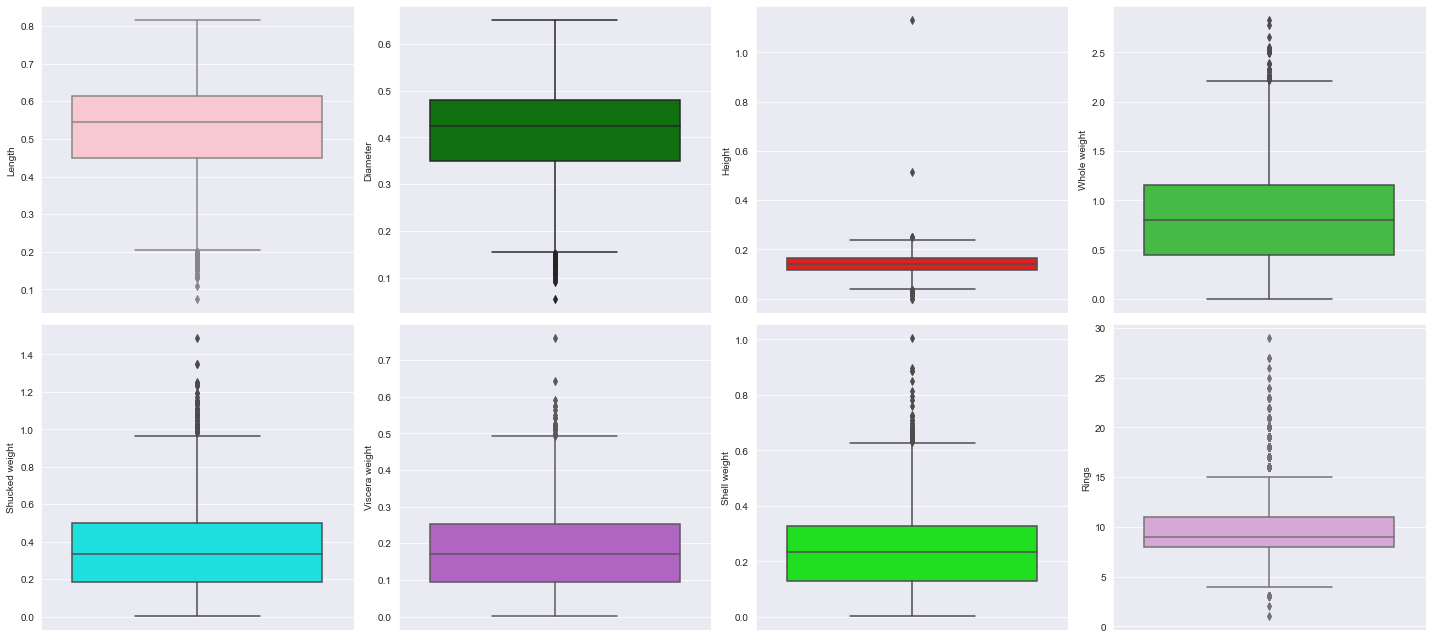

In [38]:
fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8)) =plt.subplots(nrows =2,ncols=4, figsize =(20,9))
sns.boxplot(ax =ax1, y='Length', data=abalone, color ='Pink')
sns.boxplot(ax=ax2, y='Diameter', data=abalone, color= 'green')
sns.boxplot(ax=ax3, y='Height', data=abalone, color= 'red')
sns.boxplot(ax=ax4, y='Whole weight', data=abalone, color= 'limegreen')
sns.boxplot(ax=ax5, y='Shucked weight', data=abalone, color= 'cyan')
sns.boxplot(ax=ax6, y='Viscera weight', data=abalone, color= 'mediumorchid')
sns.boxplot(ax=ax7, y='Shell weight', data=abalone, color= 'lime')
sns.boxplot(ax=ax8, y='Rings', data=abalone, color= 'plum')
plt.show()

**Boxplot shows the outliers present in dataset.**

### Outliers Detection basesd on IQR

In [39]:
df =abalone.copy()
Q1 =df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64


In [40]:
df_new =df[~((abalone <(Q1 - 1.5*IQR)) | (abalone >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(3781, 9)


**Data Loss**

In [41]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((4177-3781)/4177)*100,'%')

Percentage Data Loss : 9.480488388795786 %


#### Comment -
1. There is significant data loss using IQR method.
2. From pairplot and Boxplot we know that outliers are present in dataset but as datapoints are not much scatter.
3. Most of outliers exist in 4th quartile of dataset as we can see in boxplot.

## Label Encoding

In [42]:
df_new['Sex']=df_new['Sex'].astype('category')

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_new['Sex']=labelencoder.fit_transform(df_new['Sex'])
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Multicollinearity and Skewness Handling


**Skewness of features using distplot**

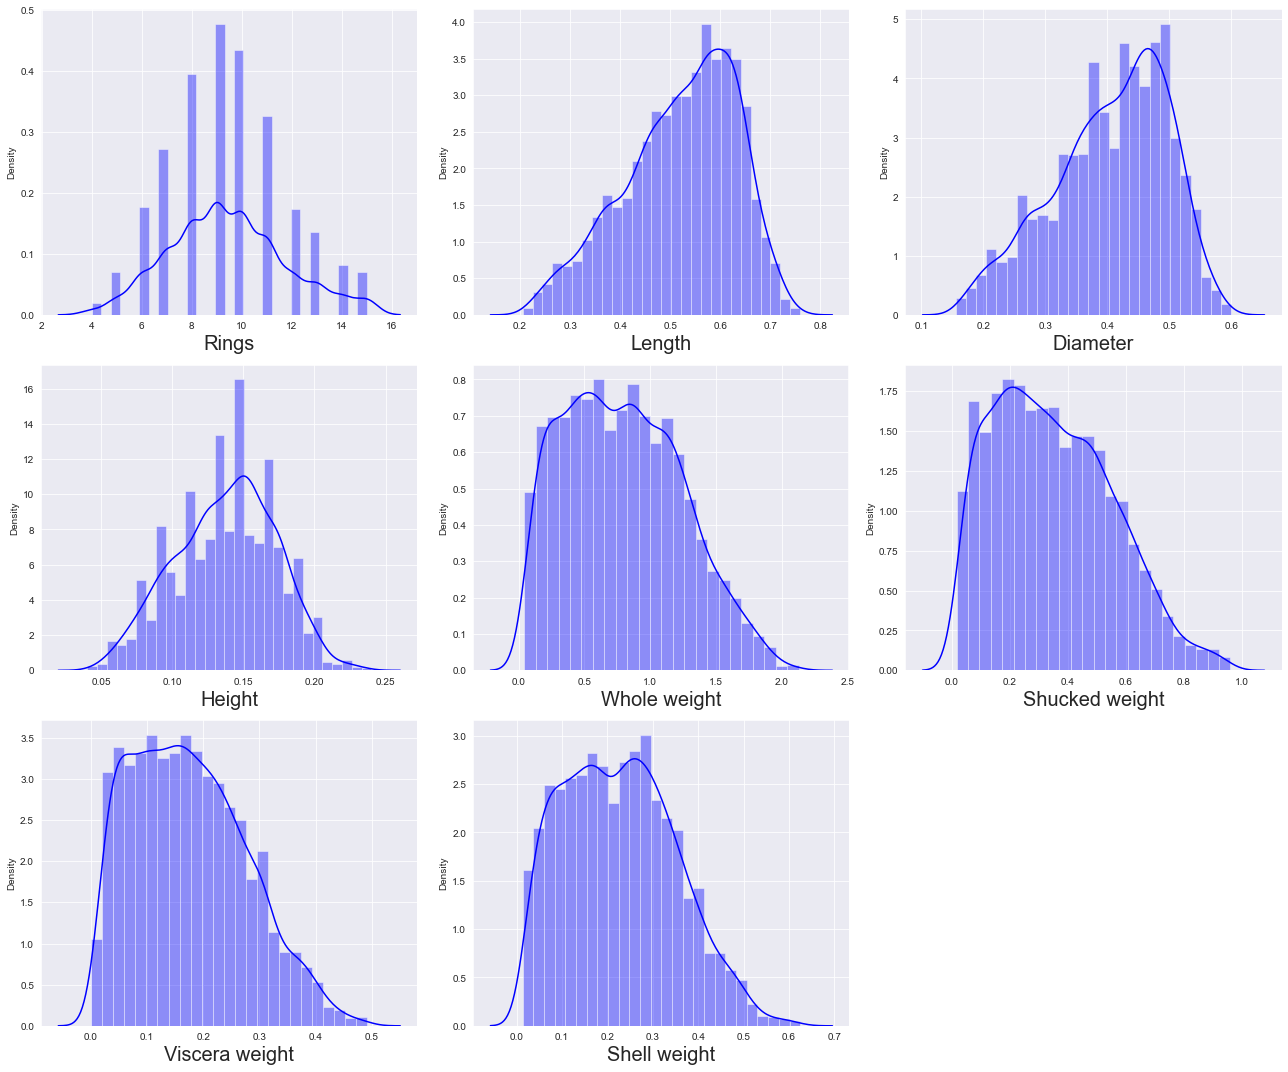

In [44]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in Numerical:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [45]:
df_new[Numerical].skew()

Rings             0.269205
Length           -0.495017
Diameter         -0.481941
Height           -0.152640
Whole weight      0.345472
Shucked weight    0.455297
Viscera weight    0.454848
Shell weight      0.342490
dtype: float64

#### Comment -

1. Optimal range for skewness is -0.5 to 0.5.
2. We can see all features within permissible limit.

### Scaling data : Standard Scalar

In [46]:
X=df_new.drop(columns =['Rings'])
Y=df_new['Rings']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [48]:
X_scaled.shape

(3781, 8)

### **Checking Multicollinearity between features using variance_inflation_factor**

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#data2=data.copy()
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['Features']= X_scaled.columns
vif

,VIF,Features
0,1.009043,Sex
1,39.611800,Length
2,40.237240,Diameter
3,6.451622,Height
4,107.863522,Whole weight
5,29.447571,Shucked weight
6,17.194691,Viscera weight
7,22.921403,Shell weight


#### Comment -

1. We looked that variable inflation factor for all variable and it appears that all predictors have multicollinearity issue
2. Length and diameter are geometrical physical dimension of abalone.These all parameter are highly correleated.
3. Variable Whole_weight should be the linear function of variables Shucked_weight, Viscersa_weight and Shell_weight, and we could write it as Whole_weight = Shucked_weight + Viscera_weight+ Shell_weight + unknown mass of water/blood lost from shucking process. So we can find high colliearity between these features.
4. for further investigation we will drop Whole Weight and Diameter.

In [50]:
X_scaled = X_scaled.drop(columns=['Whole weight'],axis=1)

In [51]:
X_scaled = X_scaled.drop(columns=['Diameter'],axis=1)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['Features']= X_scaled.columns
vif

,VIF,Features
0,1.008746,Sex
1,10.311309,Length
2,6.323769,Height
3,9.375870,Shucked weight
4,10.719378,Viscera weight
5,10.556842,Shell weight


**Now all features are within permissible VIF limit**

### Heatmap after VIF

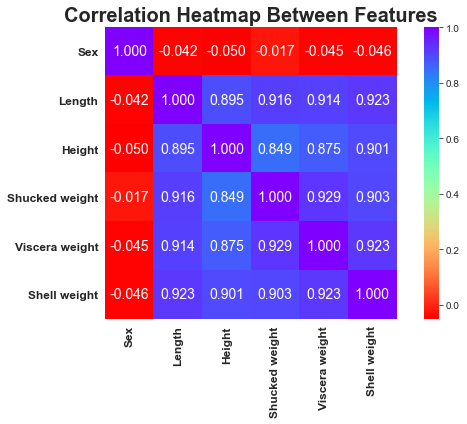

In [53]:
# cmap =PiYG cmap='Spectral'
plt.figure(figsize= (8,6))
sns.heatmap(X_scaled.corr(), annot= True,fmt='0.3f',square= True, annot_kws={'size':14}, cmap= 'rainbow_r')
plt.title('Correlation Heatmap Between Features',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold', rotation=90)
plt.yticks(fontsize=12,fontweight ='bold', rotation=0)
plt.tight_layout()
plt.show()

- **We can see that Shucked weight, Viscera weight , Shell weight are highly correlated with each other.**

### Machine Learning Model Building

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=25, test_size=.2)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (3024, 6)
Training target vector size: (3024,)
Test feature matrix size: (757, 6)
Test target vector size: (757,)


### Finding Best Random state

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=i, test_size=.2)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5418770459803035 on Random_state 83


### Linear Regression : Base model

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state= 83, test_size=0.2)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 1.2437128405011586
Mean squared error : 2.474904353508583
Root Mean squared error : 1.5731828735110813
 R2 Score :
54.18770459803035


In [78]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scaled, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.3994648472841853
Difference in R2 & CV Score: 14.241219869611818


 True Values Vs Predicted Value plot :


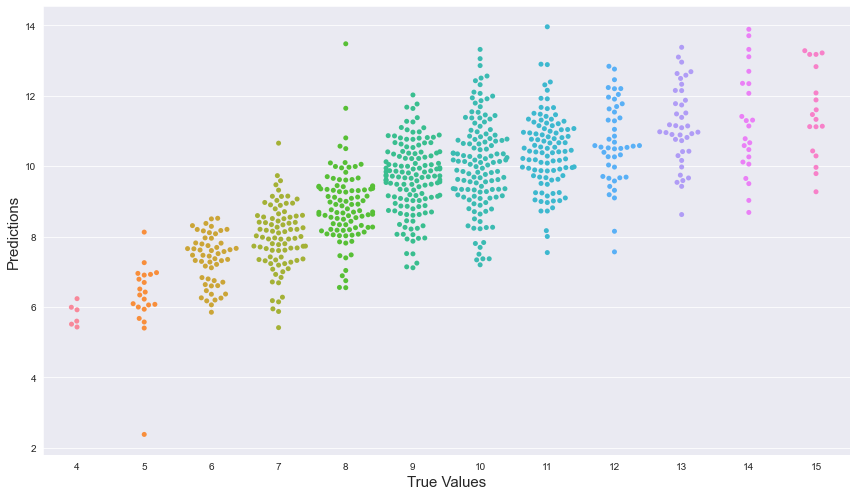

In [79]:
plt.figure(figsize=(12,7))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### **Random Forest Regressor**

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state= 83, test_size=0.20)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 1.201003963011889
Mean squared error : 2.3371339498018493
Root Mean squared error : 1.5287687692394325
R2 Score of Random Forest Regressor :
56.73793585174074


In [81]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scaled, Y, cv=3)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.49028930387161335
Difference in R2 & CV Score: 7.7090054645794055


### **Decision Tree Regressor**

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state= 83, test_size=0.20)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 1.5693527080581242
Mean squared error : 4.462351387054161
Root Mean squared error : 2.112427841857364
R2 Score of Decision Tree Regressor :
17.398601832309033


In [83]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scaled, Y, cv=3)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.007956078915752673
Difference in R2 & CV Score: 18.1942097238843


### **Extra Trees Regressor**

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state= 83, test_size=0.20)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 1.2189299867899603
Mean squared error : 2.4021430647291937
Root Mean squared error : 1.5498848553131919
R2 Score of Extra Tree Regressor :
55.53456943774175


In [85]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scaled, Y, cv=3)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.48768672838845323
Difference in R2 & CV Score: 6.7658965988964255


### **XGB Regressor**

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state= 83, test_size=0.20)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 1.2764235991625363
Mean squared error : 2.6195388435094586
Root Mean squared error : 1.6184989476392806
R2 Score of XGB Regressor :
51.510414070887414


In [87]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scaled, Y, cv=3)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.4537138161670414
Difference in R2 & CV Score: 6.13903245418328


### **AdaBoost Regressor**

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state= 271, test_size=0.20)
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
y_pred = adb.predict(X_test)
print('\033[1m'+ 'Error of AdaBoost Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of AdaBoost Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of AdaBoost Regressor:
Mean absolute error : 1.4768959991687476
Mean squared error : 3.255101500943032
Root Mean squared error : 1.804189984714202
R2 Score of AdaBoost Regressor :
39.709654043163944


In [91]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(adb, X_scaled, Y, cv=3)
print('\033[1m'+'Cross Validation Score :',adb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.40344849947543504
Difference in R2 & CV Score: -0.6351959043795574


### **Gradient Boosting Regressor**

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state= 83, test_size=0.20)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
y_pred = adb.predict(X_test)
print('\033[1m'+ 'Error of Gradient Boosting Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Gradient Boosting Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Gradient Boosting Regressor:
Mean absolute error : 1.409743393389664
Mean squared error : 2.9428203616766506
Root Mean squared error : 1.7154650569675416
R2 Score of Gradient Boosting Regressor :
45.52623598041833


In [93]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(gbr, X_scaled, Y, cv=3)
print('\033[1m'+'Cross Validation Score :',gbr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.5223465502108001
Difference in R2 & CV Score: -6.708419040661681


***we can see that Random forest Regressor() gives maximum Accuracy. So we will apply Hyperparameter tuning on Random forest Regressor***

### Hyper Parameter Tuning : GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters = [{
         'max_depth': [10, 30, 50,100 ],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'n_estimators': [50, 100,250,500 ]}] 

In [96]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=3,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3; 1/96] START max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/3; 1/96] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.448 total time=   2.5s
[CV 2/3; 1/96] START max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 2/3; 1/96] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.508 total time=   0.6s
[CV 3/3; 1/96] START max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 3/3; 1/96] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.543 total time=   0.8s
[CV 1/3; 2/96] START max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/3; 2/96] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.452 total time=   1.3s
[CV 2/3; 2/96] START max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100
[

[CV 3/3; 13/96] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.546 total time=   0.2s
[CV 1/3; 14/96] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/3; 14/96] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.479 total time=   0.4s
[CV 2/3; 14/96] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/3; 14/96] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.529 total time=   0.4s
[CV 3/3; 14/96] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 3/3; 14/96] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.552 total time=   0.4s
[CV 1/3; 15/96] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=250
[CV 1/3; 15/96] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=250;, score=0.471 total time=   1.4s
[CV 2/3; 15/96] ST

[CV 3/3; 26/96] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.524 total time=   1.1s
[CV 1/3; 27/96] START max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=250
[CV 1/3; 27/96] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.446 total time=   2.6s
[CV 2/3; 27/96] START max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=250
[CV 2/3; 27/96] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.505 total time=   2.7s
[CV 3/3; 27/96] START max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=250
[CV 3/3; 27/96] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.536 total time=   2.8s
[CV 1/3; 28/96] START max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=500
[CV 1/3; 28/96] END max_depth=30, max_features=auto, min_samples_leaf=1, n_estimators=500;, score=0.446 total time=   5.4s
[CV 2/3; 28/96] S

[CV 3/3; 39/96] END max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=250;, score=0.542 total time=   1.5s
[CV 1/3; 40/96] START max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=500
[CV 1/3; 40/96] END max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=500;, score=0.461 total time=   3.3s
[CV 2/3; 40/96] START max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=500
[CV 2/3; 40/96] END max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=500;, score=0.520 total time=   3.2s
[CV 3/3; 40/96] START max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=500
[CV 3/3; 40/96] END max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=500;, score=0.546 total time=   3.3s
[CV 1/3; 41/96] START max_depth=30, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/3; 41/96] END max_depth=30, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.462 total time=   0.2s
[CV 2/3; 41/96] STA

[CV 3/3; 52/96] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=500;, score=0.533 total time=   5.3s
[CV 1/3; 53/96] START max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/3; 53/96] END max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.442 total time=   0.4s
[CV 2/3; 53/96] START max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 2/3; 53/96] END max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.508 total time=   0.4s
[CV 3/3; 53/96] START max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 3/3; 53/96] END max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.539 total time=   0.4s
[CV 1/3; 54/96] START max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/3; 54/96] END max_depth=50, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.446 total time=   1.1s
[CV 2/3; 54/96] START m

[CV 3/3; 65/96] END max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.550 total time=   0.2s
[CV 1/3; 66/96] START max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/3; 66/96] END max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.468 total time=   0.4s
[CV 2/3; 66/96] START max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 2/3; 66/96] END max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.519 total time=   0.5s
[CV 3/3; 66/96] START max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/3; 66/96] END max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.549 total time=   0.5s
[CV 1/3; 67/96] START max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=250
[CV 1/3; 67/96] END max_depth=50, max_features=sqrt, min_samples_leaf=2, n_estimators=250;, score=0.468 total time=   1.2s
[CV 2/3; 67/96] ST

[CV 3/3; 78/96] END max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.534 total time=   0.8s
[CV 1/3; 79/96] START max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=250
[CV 1/3; 79/96] END max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=250;, score=0.452 total time=   2.3s
[CV 2/3; 79/96] START max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=250
[CV 2/3; 79/96] END max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=250;, score=0.514 total time=   2.5s
[CV 3/3; 79/96] START max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=250
[CV 3/3; 79/96] END max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=250;, score=0.538 total time=   2.3s
[CV 1/3; 80/96] START max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=500
[CV 1/3; 80/96] END max_depth=100, max_features=auto, min_samples_leaf=2, n_estimators=500;, score=0.452 total time=   5.1s
[CV 2/3;

[CV 2/3; 91/96] END max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=250;, score=0.521 total time=   1.2s
[CV 3/3; 91/96] START max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=250
[CV 3/3; 91/96] END max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=250;, score=0.550 total time=   1.2s
[CV 1/3; 92/96] START max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=500
[CV 1/3; 92/96] END max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=500;, score=0.468 total time=   3.2s
[CV 2/3; 92/96] START max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=500
[CV 2/3; 92/96] END max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=500;, score=0.524 total time=   2.8s
[CV 3/3; 92/96] START max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=500
[CV 3/3; 92/96] END max_depth=100, max_features=sqrt, min_samples_leaf=2, n_estimators=500;, score=0.552 total time=   3.0s
[CV 1/3;

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [10, 30, 50, 100],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 2, 4],
                          'n_estimators': [50, 100, 250, 500]}],
             verbose=10)

In [97]:
GCV.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [98]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Final Model

In [99]:
Final_mod=RandomForestRegressor(max_depth = 10, max_features='sqrt', min_samples_leaf = 1,
                                n_estimators = 100 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 1.1789676190134526
Mean squared error : 2.2054350608003586
Root Mean Squared Error: 1.4850707258579836


 R2 Score of Final Model :
0.5917577891363286




 True Values Vs Predicted Value plot :


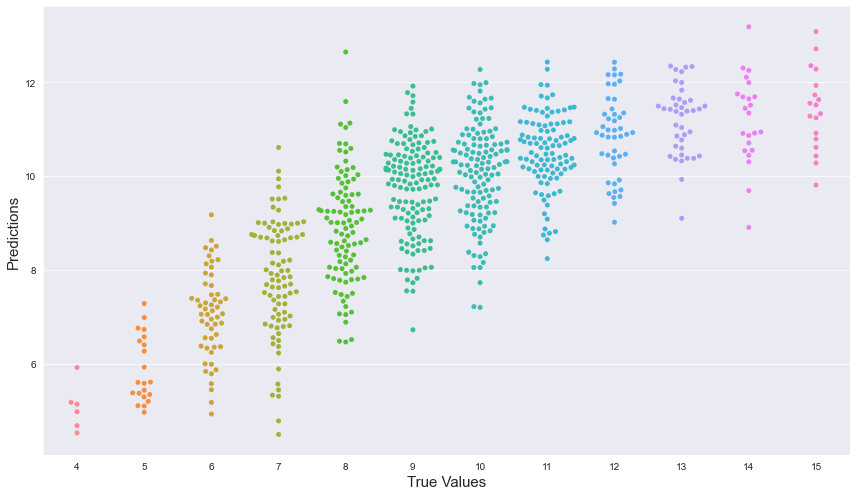

In [100]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

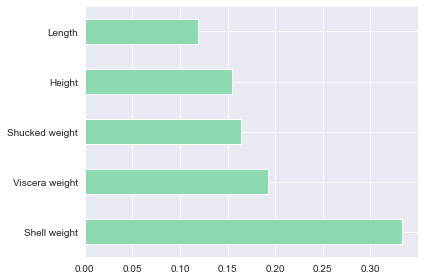

In [103]:
feat_importances = pd.Series(Final_mod.feature_importances_, index=X_scaled.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')
plt.show()

### 'Shell weight' is most imporatnt feature for this model.

### Saving Model

In [104]:
import joblib
joblib.dump(Final_mod,'Abalone Ring Age Prediction_Final.pkl')

['Abalone Ring Age Prediction_Final.pkl']